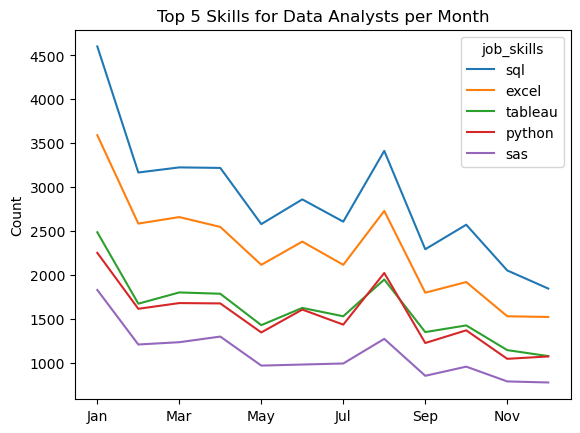

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#load Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#get Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Extract the month & job skills column
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month
df_DA_US_exploded = df_DA_US.explode('job_skills')

#pivot data to get the count of each skill per month
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#create a total row
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop(index='Total')

#Change mont no to month name
df_DA_US_pivot = df_DA_US_pivot.reset_index()
df_DA_US_pivot['job_posted_month'] = df_DA_US_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_pivot = df_DA_US_pivot.set_index('job_posted_month')
df_DA_US_pivot = df_DA_US_pivot.drop(columns='job_posted_month_no')
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

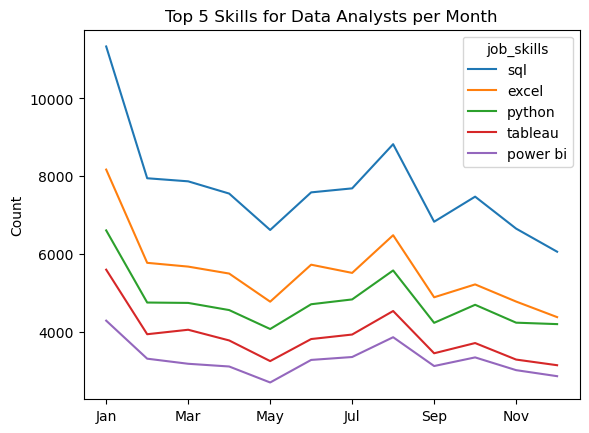

In [12]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode= df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)
# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop('Total')

# code snippet from `6_Exercise_Job_Demand.ipynb`
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

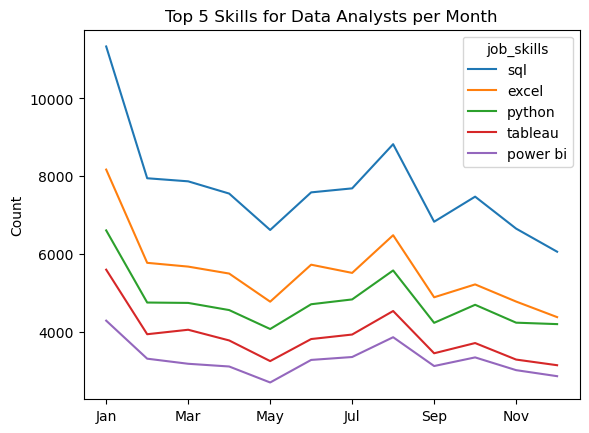

In [14]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#load Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#get Data Analyst jobs in the US
df_DA_jobs = df[df['job_title_short'] == 'Data Analyst'].copy()

#Extract the month & job skills column
df_DA_jobs['job_posted_month_no'] = df_DA_jobs['job_posted_date'].dt.month
df_DA_jobs_exploded = df_DA_jobs.explode('job_skills')

#pivot data to get the count of each skill per month
df_DA_jobs_pivot = df_DA_jobs_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
#create a total row
df_DA_jobs_pivot.loc['Total'] = df_DA_jobs_pivot.sum()
df_DA_jobs_pivot = df_DA_jobs_pivot[df_DA_jobs_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_jobs_pivot = df_DA_jobs_pivot.drop(index='Total')

#Change mont no to month name
df_DA_jobs_pivot = df_DA_jobs_pivot.reset_index()
df_DA_jobs_pivot['job_posted_month'] = df_DA_jobs_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_jobs_pivot = df_DA_jobs_pivot.set_index('job_posted_month')
df_DA_jobs_pivot = df_DA_jobs_pivot.drop(columns='job_posted_month_no')
df_DA_jobs_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()